## Random Forest

![](https://velog.velcdn.com/images/newnew_daddy/post/eef1d250-a92a-4a5a-ac98-4273d8fcebc4/image.png)

- 대표적인 앙상블 학습 기법의 하나로, 여러개의 결정 트리(Decision Tree)를 결합하여 예측 성능을 향상시키는 방법.
- 분류와 회귀 모델에 모두 사용이 가능하며 특히 과적합 방지에 효과적이다.

#### 동작 원리

1. **훈련 데이터 생성**:
- 부트스트랩 샘플링을 통해 여러 개의 훈련 데이터셋을 생성합니다. 각 트리는 이 훈련 데이터셋 중 하나로 학습됩니다.

2. **트리 학습**:
- 각 트리는 특정 수의 특성들 중에서 무작위로 선택된 서브셋을 사용하여 데이터 분할을 수행합니다. 이렇게 생성된 트리는 서로 다른 부분을 학습하게 되어, 전체 모델의 다양성을 높입니다.

3. **예측 결합**:
- 분류 문제에서는 각 트리의 예측 결과를 투표로 결합하여 최종 클래스를 결정하고, 회귀 문제에서는 평균을 내어 최종 예측 값을 결정합니다.

In [2]:
import pandas as pd

df = pd.read_csv('./dataset/fish.csv')

df.head(), df.shape

(  Species  Weight  Length  Diagonal   Height   Width
 0   Bream   242.0    25.4      30.0  11.5200  4.0200
 1   Bream   290.0    26.3      31.2  12.4800  4.3056
 2   Bream   340.0    26.5      31.1  12.3778  4.6961
 3   Bream   363.0    29.0      33.5  12.7300  4.4555
 4   Bream   430.0    29.0      34.0  12.4440  5.1340,
 (159, 6))

In [5]:
input_cols = df.columns[1:]

X = df[input_cols].values
y = df['Species'].values

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### RandomForestClassifier 메소드의 주요 인자 설명

```python
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,      # 사용할 결정 트리의 개수. 기본값은 100. 트리 수가 많을수록 일반적으로 성능이 향상되지만 계산 비용도 증가함.
    criterion='gini',      # 분할 품질을 평가하는 기준. 'gini'는 지니 불순도, 'entropy'는 정보 이득을 사용. 기본값은 'gini'.
    max_depth=None,        # 각 트리의 최대 깊이. None으로 설정하면 트리의 모든 리프가 순수해질 때까지 또는 리프에 미니 샘플보다 적은 샘플이 있을 때까지 확장.
    min_samples_split=2,   # 내부 노드를 분할하는 데 필요한 최소 샘플 수. 너무 작은 값을 사용하면 과적합의 위험이 증가.
    min_samples_leaf=1,    # 리프 노드에 있어야 하는 최소 샘플 수. 과적합을 줄이기 위해 사용할 수 있음.
    min_weight_fraction_leaf=0.0, # 리프 노드의 최소 가중치 샘플 비율. 샘플의 가중치가 있는 경우 사용.
    max_features='auto',   # 각 분할에서 고려할 최대 특성 수. 'auto'는 분류 문제의 경우 특성 수의 제곱근을 의미. 'sqrt' 또는 'log2'도 사용할 수 있음.
    max_leaf_nodes=None,   # 리프 노드의 최대 수를 제한. 트리의 크기를 줄이는 데 유용.
    min_impurity_decrease=0.0, # 분할이 필요한 최소 순수도 감소. 이 값보다 큰 경우에만 분할이 이루어짐.
    bootstrap=True,        # 부트스트랩 샘플링을 사용할지 여부. True이면 무작위 샘플로 각 트리를 학습.
    oob_score=False,       # Out-of-bag 샘플을 사용하여 일반화 정확도를 추정할지 여부. True로 설정하면 모델이 적합된 후 oob_score_ 속성을 통해 OOB 점수를 사용할 수 있음.
    n_jobs=None,           # 작업을 수행할 병렬 작업 수. -1로 설정하면 가능한 모든 프로세서를 사용.
    random_state=None,     # 난수 시드. 동일한 데이터를 동일한 상태로 분할하려면 동일한 값을 사용.
    verbose=0,             # 학습 과정 중 출력할 정보의 양. 0이면 아무것도 출력하지 않음.
    class_weight=None,     # 클래스의 가중치를 지정. 'balanced'는 입력 데이터에서 자동으로 가중치를 계산하여 클래스 불균형을 보정.
)

```

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators = 10,
    max_depth=3,
    criterion = 'entropy',
    random_state = 0
    )

rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=10,
                       random_state=0)

In [48]:
y_pred = rf.predict(X_test)

yt  = pd.DataFrame(y_test, columns=['test'])
yp  = pd.DataFrame(y_pred, columns=['pred'])

# pd.concat([yt, yp], axis=1)

In [49]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.7478991596638656
0.6


In [50]:
## 각 인자별 중요도
## rf.feature_importances_

pd.concat([pd.DataFrame(input_cols), pd.DataFrame(rf.feature_importances_)], axis=1)

,0,0
0,Weight,0.177246
1,Length,0.172504
2,Diagonal,0.158161
3,Height,0.344475
4,Width,0.147615


In [51]:
## RF 모델에 사용된 결정트리 개수

len(rf.estimators_)

10

In [52]:
rf.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

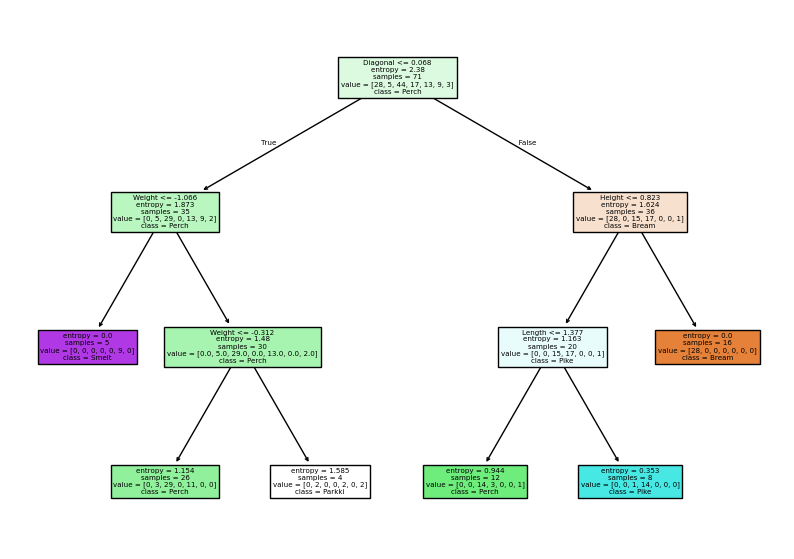

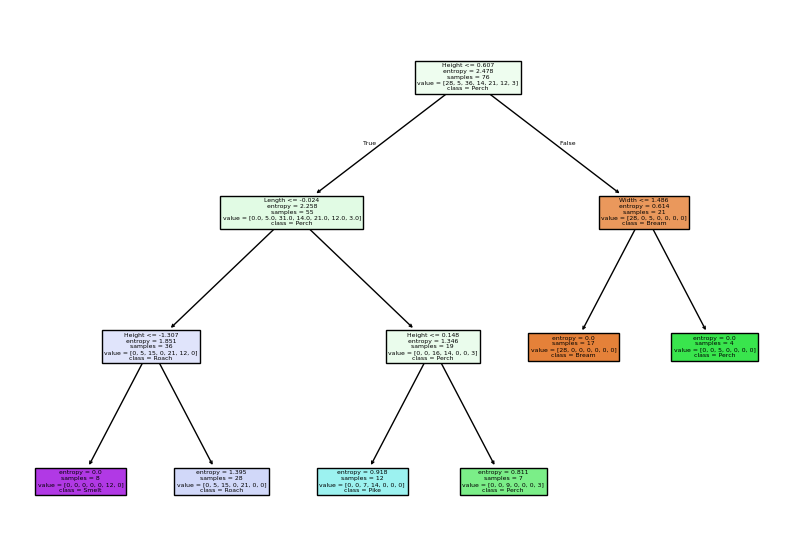

In [56]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

for i in range(2):
    plt.figure(figsize=(10,7))
    plot_tree(rf.estimators_[i], filled=True, feature_names=input_cols, class_names=rf.classes_)
    plt.show()

Accuracy: 0.600
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

       Bream       0.89      1.00      0.94         8
      Parkki       0.00      0.00      0.00         3
       Perch       0.46      1.00      0.63        13
        Pike       1.00      0.29      0.44         7
       Roach       0.00      0.00      0.00         5
       Smelt       1.00      1.00      1.00         1
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.60        40
   macro avg       0.48      0.47      0.43        40
weighted avg       0.53      0.60      0.50        40

Confusion Matrix:
[[ 8  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0 13  0  0  0  0]
 [ 0  0  5  2  0  0  0]
 [ 0  0  5  0  0  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  0  2  0  0  0  0]]
--------------------------------------------------


/Users/hyunsoo/Desktop/Lecture/lecture/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hyunsoo/Desktop/Lecture/lecture/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hyunsoo/Desktop/Lecture/lecture/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

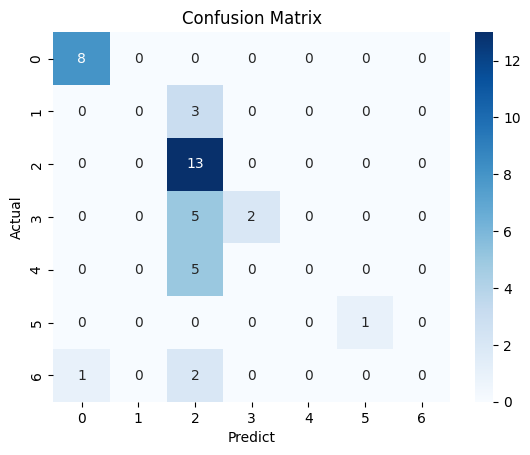

In [57]:
from utils import evaluate_cls_model

evaluate_cls_model(y_test, y_pred)